<a href="https://colab.research.google.com/github/JoeAM11/MachineLearning_EM23/blob/main/ProyectoFinal_ML_Integraci%C3%B3nTareas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/JoeAM11/MachineLearning_EM23.git


Cloning into 'MachineLearning_EM23'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 135 (delta 51), reused 81 (delta 35), pack-reused 3
Receiving objects: 100% (135/135), 2.43 MiB | 10.45 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [2]:
# Librerías

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.cluster import KMeans

In [3]:
# dataframe con toda la información. Antes de partir en entrenamiento y testing
df = pd.read_csv('/content/MachineLearning_EM23/prognosis.csv')

# dataframe sin la prognosis, para que no entre en los siguientes conteos. 
df_noprog = df.iloc[:, :-1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

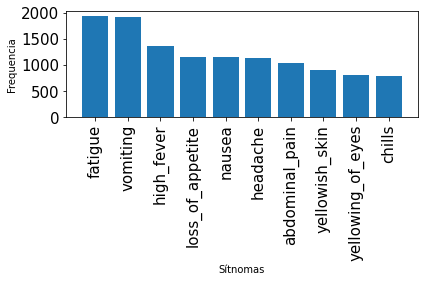

In [7]:
# Tabla de conteos de cuantas veces se tiene la presencia de un sítnoma, sin importar la enfermedad. 
# Estos podrías llegar a ser los menos relevantes para determinar una enfermedad, dado son los más comúnes, lo cuál quiere decir que se puede confundir entre enfermedades. 
col_sum = df_noprog.sum(axis=0).sort_values(ascending=False)

col_sum_top10 = col_sum[0:10]
col_sum_top10

#fig = plt.figure(figsize=(30, 30), dpi=10)



plt.bar(col_sum_top10.index, col_sum_top10.values)

# Add title and axis labels
plt.xlabel('Sítnomas')
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequencia')
plt.tight_layout()
plt.savefig("FrecuenciaSintomas.pdf")
files.download("FrecuenciaSintomas.pdf")



In [13]:
# Tabla de conteos de cuántas veces se tiene la presencia de un síntoma cuando se sabe existe diabetes
# Estos síntmas son los que más se repiten y hay que prestar especial atención. 

df_diabetes = df.groupby("prognosis") 
df_diabetes_positive = df_diabetes.get_group(1)
df_diabetes_positive_noprog = df_diabetes_positive.iloc[:, :-1]

col_sum_diabetes = df_diabetes_positive_noprog.sum(axis=0).sort_values(ascending=False)

#Los 10 síntomas presentes en la diabetes
col_sum_diabetes[0:10]

increased_appetite              120
polyuria                        120
weight_loss                     114
irregular_sugar_level           114
blurred_and_distorted_vision    114
fatigue                         114
lethargy                        114
restlessness                    114
excessive_hunger                114
obesity                         114
dtype: int64

In [14]:
# Que tan comunes son los síntomas de la diabetes en otras prognosis

# Del df completo, solo sacar las columnas de los sintomas de diabetes
df_noprog_diabetes = df_noprog[["increased_appetite","polyuria","weight_loss","irregular_sugar_level","blurred_and_distorted_vision","fatigue","lethargy","restlessness","excessive_hunger","obesity"]]

# Del df de los que se sabe SI tienen diabetes, solo sacar las columnas de los síntomas de diabetes
df_diabetes_positive_noprog_symptoms = df_diabetes_positive_noprog[["increased_appetite","polyuria","weight_loss","irregular_sugar_level","blurred_and_distorted_vision","fatigue","lethargy","restlessness","excessive_hunger","obesity"]]


col_sum_df_noprog_diabetes = df_noprog_diabetes.sum(axis=0)
col_sum_df_noprog_diabetes


col_sum_df_diabetes_positive_noprog_symptoms = df_diabetes_positive_noprog_symptoms.sum(axis=0).sort_values(ascending=False)
col_sum_df_diabetes_positive_noprog_symptoms

df_t = pd.DataFrame()
df_t["Síntoma"] = col_sum_df_diabetes_positive_noprog_symptoms.index
df_t["Frecuencia Total"] = col_sum_df_noprog_diabetes.values
df_t["Frecuencia positivo diabetes"] = col_sum_df_diabetes_positive_noprog_symptoms.values
df_t["Proporción"] = col_sum_df_diabetes_positive_noprog_symptoms.values / col_sum_df_noprog_diabetes.values 

df_t

# Entre más alto esté la proporción, es un indicador de los síntomas que más podrían ayudar a determinar la existencia de diabetes dado que son síntomas que solo están presentes en esa enferdad y ninguna otra. 
# Esperaría que las variables cercanas a 1 tengan alta correlación con la presencia de de diabetes 
# Esto solo lo realicé para los 10 síntomas más comunes de diabetes. 


,Síntoma,Frecuencia Total,Frecuencia positivo diabetes,Proporción
0,increased_appetite,120,120,1.000000
1,polyuria,120,120,1.000000
2,weight_loss,456,114,0.250000
3,irregular_sugar_level,114,114,1.000000
4,blurred_and_distorted_vision,342,114,0.333333
5,fatigue,1932,114,0.059006
6,lethargy,456,114,0.250000
7,restlessness,228,114,0.500000
8,excessive_hunger,462,114,0.246753
9,obesity,228,114,0.500000


<ipython-input-16-b4e77457d916>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prog_diabetes["prognosis"] = df.prognosis


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

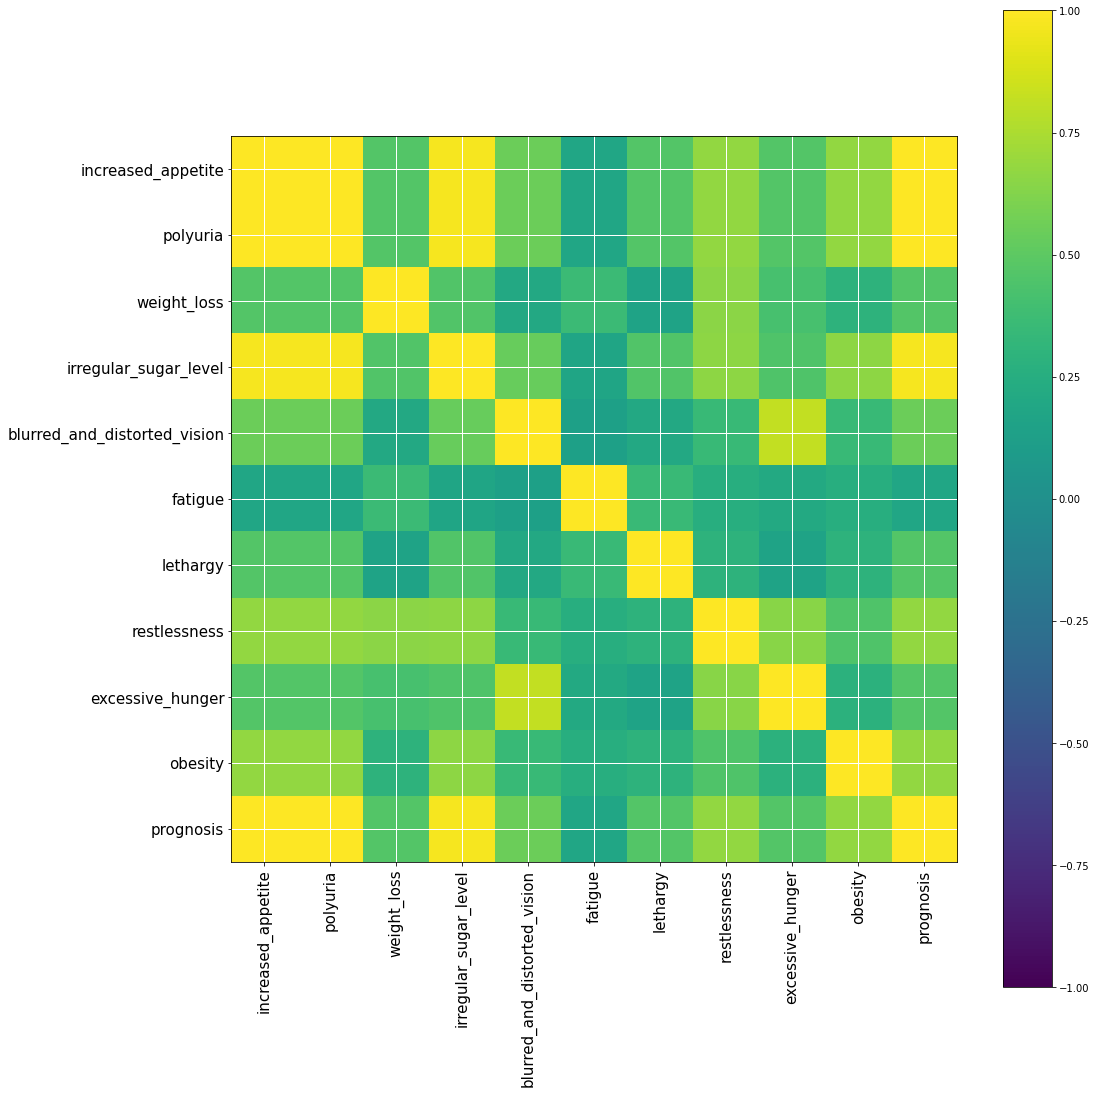

In [16]:
# Correlación linear entre los sítnomasmás comunes y diabetes para mi conjunto de datos
  # Aquí importante destacar como los tres síntomas principales tienen alta correlación, comentar de de los demás tambén. 

# df con todos los registros pero solo los síntomas de diabetes
df_prog_diabetes = pd.DataFrame()
df_prog_diabetes = df_noprog_diabetes
df_prog_diabetes["prognosis"] = df.prognosis


plt.figure(figsize = (15, 15)) # Ajustar a una imagen más grando dado tengo 133 variables 
corr_complete = df_prog_diabetes.corr()
ticks_ = list(range(len(df_prog_diabetes.columns))) # Para saber cuantas particiónes necesito, es decir cuantas variables haré la correlación 
plt.imshow(corr_complete)
plt.xticks(ticks = ticks_, labels = df_prog_diabetes.columns, rotation = 90)
plt.yticks(ticks = ticks_, labels = df_prog_diabetes.columns)
plt.clim(vmin = -1, vmax = 1)
plt.colorbar()
for i in range(len(corr_complete.columns)):
    plt.axhline(y=i, color='white', linewidth=1)
    plt.axvline(x=i, color='white', linewidth=1)
plt.tight_layout()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("correl.pdf")
files.download("correl.pdf")

# Conectar esto con correlation based feature selection 
# CBFS solo toma en cuenta las relaciónes uno a uno de las variables e ignora lo que puedan aportar variables a la predicción cuando interaccionan entre ellas
# CBFS es un feature selection lineal mientras que Mutual informaton based feature selection es no lineal. 


In [ ]:
corr_complete

,increased_appetite,polyuria,weight_loss,irregular_sugar_level,blurred_and_distorted_vision,fatigue,lethargy,restlessness,excessive_hunger,obesity,prognosis
increased_appetite,1.000000,1.000000,0.467447,0.974071,0.547403,0.180444,0.467447,0.679662,0.464053,0.679662,1.000000
polyuria,1.000000,1.000000,0.467447,0.974071,0.547403,0.180444,0.467447,0.679662,0.464053,0.679662,1.000000
weight_loss,0.467447,0.467447,1.000000,0.453929,0.210285,0.363027,0.158885,0.649704,0.416130,0.289625,0.467447
irregular_sugar_level,0.974071,0.974071,0.453929,1.000000,0.531616,0.174936,0.453929,0.660111,0.450631,0.660111,0.974071
blurred_and_distorted_vision,0.547403,0.547403,0.210285,0.531616,1.000000,0.133707,0.210285,0.350323,0.816154,0.350323,0.547403
fatigue,0.180444,0.180444,0.363027,0.174936,0.133707,1.000000,0.354415,0.250384,0.212003,0.250384,0.180444
lethargy,0.467447,0.467447,0.158885,0.453929,0.210285,0.354415,1.000000,0.289625,0.156620,0.289625,0.467447
restlessness,0.679662,0.679662,0.649704,0.660111,0.350323,0.250384,0.289625,1.000000,0.644984,0.448109,0.679662
excessive_hunger,0.464053,0.464053,0.416130,0.450631,0.816154,0.212003,0.156620,0.644984,1.000000,0.287010,0.464053
obesity,0.679662,0.679662,0.289625,0.660111,0.350323,0.250384,0.289625,0.448109,0.287010,1.000000,0.679662


In [17]:
a = df_diabetes_positive_noprog_symptoms

In [18]:
# De las tres variables que si o si estan en diabetes, tratar de entender en combinación con qué otras variables aparecen juntas (increaed apetite y polyuria)

import pandas as pd


# Create a dictionary to store the count of each symptom pair
symptom_counts = {}

# Iterate over each symptom in the dataframe
for i, symptom in enumerate(a.columns):
    # Iterate over the remaining symptoms in the dataframe
    for j in range(i + 1, len(a.columns)):
        # Create a key for the symptom pair
        pair = symptom + '-' + a.columns[j]
        # Initialize the count for the symptom pair to zero
        symptom_counts[pair] = 0
        # Iterate over each row in the dataframe
        for index, row in a.iterrows():
            # Check if the two symptoms appear together
            if row[symptom] == 1 and row[a.columns[j]] == 1:
                symptom_counts[pair] += 1

# Print the count of each symptom pair
for pair, count in symptom_counts.items():
    print(pair + ':', count)

# Aqui se empieza a sospechar que la información no es tan buena dado se sospecha hay muchos registros duplicados. Overfitting. 

  #increased_appetite-polyuria: 120
  #increased_appetite-weight_loss: 114
  #increased_appetite-irregular_sugar_level: 114
  #increased_appetite-blurred_and_distorted_vision: 114
  #increased_appetite-fatigue: 114
  #increased_appetite-lethargy: 114
  #increased_appetite-restlessness: 114
  #increased_appetite-excessive_hunger: 114
  #increased_appetite-obesity: 114
  #polyuria-weight_loss: 114
  #polyuria-irregular_sugar_level: 114
  #polyuria-blurred_and_distorted_vision: 114
  #polyuria-fatigue: 114
  #polyuria-lethargy: 114
  #polyuria-restlessness: 114
  #polyuria-excessive_hunger: 114
  #polyuria-obesity: 114

increased_appetite-polyuria: 120
increased_appetite-weight_loss: 114
increased_appetite-irregular_sugar_level: 114
increased_appetite-blurred_and_distorted_vision: 114
increased_appetite-fatigue: 114
increased_appetite-lethargy: 114
increased_appetite-restlessness: 114
increased_appetite-excessive_hunger: 114
increased_appetite-obesity: 114
polyuria-weight_loss: 114
polyuria-irregular_sugar_level: 114
polyuria-blurred_and_distorted_vision: 114
polyuria-fatigue: 114
polyuria-lethargy: 114
polyuria-restlessness: 114
polyuria-excessive_hunger: 114
polyuria-obesity: 114
weight_loss-irregular_sugar_level: 108
weight_loss-blurred_and_distorted_vision: 108
weight_loss-fatigue: 108
weight_loss-lethargy: 108
weight_loss-restlessness: 108
weight_loss-excessive_hunger: 108
weight_loss-obesity: 108
irregular_sugar_level-blurred_and_distorted_vision: 108
irregular_sugar_level-fatigue: 108
irregular_sugar_level-lethargy: 108
irregular_sugar_level-restlessness: 108
irregular_sugar_level-excessive_hun

# Tarea 04  Feature Selection 

In [19]:
# Mutual information based feature 


import pandas as pd
from sklearn.feature_selection import mutual_info_classif


# Split the dataset into features and target
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# Compute mutual information between each feature and the target
mutual_info = mutual_info_classif(X, y)

# Sort the features based on mutual information
feature_scores = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Print the ranked features
print(feature_scores)

#Mutual information (MI) is a measure of the amount of information that two variables share. In the context of feature selection, mutual information can be used to quantify the amount of information that a feature provides about the target variable.
#More specifically, mutual information measures the reduction in uncertainty about the target variable that is achieved by knowing the value of a feature. The higher the mutual information score between a feature and the target variable, the more information that feature provides about the target, and the more likely it is to be useful for predicting the target variable.

polyuria                 0.114767
increased_appetite       0.114767
irregular_sugar_level    0.105527
restlessness             0.072310
obesity                  0.070159
                           ...   
indigestion              0.000000
swollen_extremeties      0.000000
dehydration              0.000000
sunken_eyes              0.000000
dischromic _patches      0.000000
Length: 132, dtype: float64


# Tarea 06 - Aprendizaje No Supervisado 



In [10]:
df_noprog

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

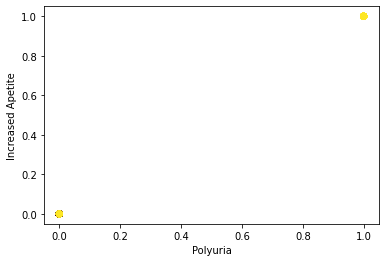

In [20]:
# Create KMeans model and fit the data
kmeans = KMeans(n_clusters=2).fit(df_noprog)

# Es justamente en esta parte donde tenerlo previamente categorizado no hace mucho sentido hacer supervised learninig. 

# Get the labels assigned to each point in the dataset
labels = kmeans.labels_

# Plot the results
plt.scatter(df_noprog.polyuria, df_noprog.increased_appetite, c=labels)
plt.xlabel('Polyuria')
plt.ylabel('Increased Apetite')
plt.savefig("kmeans.pdf")
files.download("kmeans.pdf")

In [ ]:
# Mencionar que en DB Scan va a ser lo mismo 
  # Si colocarlo en la metodologpia. 

# Tarea 07 - Algoritmos Supervisados 

In [21]:
# Train = 3445 pacientes - 70%
# Test  = 1475 pacientes - 30%

df_test = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/Testing_Tarea06.csv') 
df_train = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/training_Tarea06.csv') 

## Logistic Regresion

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [23]:
! git clone https://github.com/JoeAM11/MachineLearning_EM23.git


fatal: destination path 'MachineLearning_EM23' already exists and is not an empty directory.


In [24]:
# Train = 3445 pacientes - 70%
# Test  = 1475 pacientes - 30%

df_test = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/Testing_Tarea06.csv') 
df_train = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/training_Tarea06.csv') 

# Liberías para ejecutar Linear regression para datos binarios

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Preparar data frame de training y testing 

# Sacar todas las X del dataframe de train; Quitar prognosis
x_train = df_train.drop('prognosis', axis=1)
# Sacar la variable de respuesta del data frame de train, en este caso prognosis
y_train = df_train.prognosis




# Preparar data frame de testing; mismo paso anterior pero con la matriz de test  
x_test = df_test.drop('prognosis', axis=1)
y_test = df_test.prognosis


# Fit del modelo con los datos de entrenamiento 
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [25]:

# Accuracy is defined as the number of correct predictions divided by the total number of predictions made by the model. It is a measure of how well the model is able to classify the data correctly.
# Comparar la prediccion del modelo contra el resultado real  

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Se obtuvo un accuracy de 1.0, lo cual quiere decir que para todos las pacientes que tienne diabetes, según sus síntomas, fuimos capaces de predecir que tenía Diabetes. 
# Por el momento se me hace algo sospechoso que haya funcionado tan bien a la primera.
  # Sin embargo, cabe la posibilidad que Diabetes sea una enfermedad muy bien estudiada de tal manera que se conocen muy bien sus síntomas y es difícil confundirlo con otra enfermedad. 


Accuracy: 1.0


In [26]:
# Matiriz de confusión 

#                    Predicted positive    Predicted negative
# Actual positive    True positive (TP)    False negative (FN)
# Actual negative    False positive (FP)   True negative (TN)



from sklearn.metrics import confusion_matrix, roc_curve, auc

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_matrix)


# Resultados 
  # 1436 True Positives - No se tiene la enfermedad y se predijo que se tenía.
  # 36 True negatives   - Se tiene la enferdad se predijo que se tenía. 
    # Me parece que el algoritmo está considerado el 0 como positive y el 1 como negative dado que yo sé que de la test data habían 36 casos de diabetes. 
      # Me los están marcando como TRUE NEGATIVE, cuando esperaba fuera TRUE POSITIVE
      # Pendiente de revisar dónde puedo cambiar la lógica de interpretación de 0s y 1s

Confusion matrix:
 [[1439    0]
 [   0   36]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

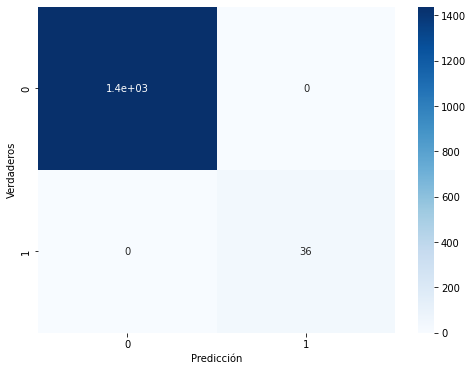

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdaderos')
plt.savefig("matrizconf.pdf")
files.download("matrizconf.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

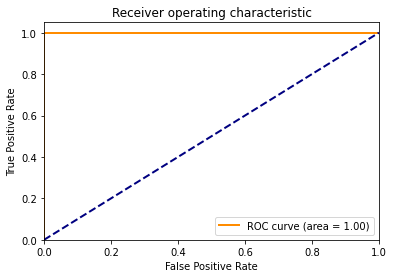

In [28]:
# ROC (Receiver Operating Characteristic) 
 # The ROC (Receiver Operating Characteristic) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds.
  # In the context of a binary classification problem like predicting the presence or absence of an illness, the TPR is the proportion of actual positive cases that are correctly 
  # identified as positive by the model (i.e., the number of true positives divided by the sum of true positives and false negatives), and the FPR is the proportion of actual negative 
  # cases that are incorrectly identified as positive by the model (i.e., the number of false positives divided by the sum of false positives and true negatives).

y_score = clf.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("ROCC.pdf")
files.download("ROCC.pdf")

## Naive Bayes 

In [29]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Naive Bayes classifier and fit it to the training data
clf = BernoulliNB()
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))



# https://www.youtube.com/watch?v=O2L2Uv9pdDA

Accuracy: 100.00%


# Tarea 07 - Clasificación 

In [30]:
! git clone https://github.com/JoeAM11/MachineLearning_EM23.git
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
df = pd.read_csv('/content/MachineLearning_EM23/Training.csv') #Importar el csv desde mi repositorio en Guthub
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
df.drop(columns=['Unnamed: 133'],inplace=True) #no entiendo porque aparecio una nueva columna, por eso la quito. 


fatal: destination path 'MachineLearning_EM23' already exists and is not an empty directory.


In [31]:
# Sets de datos de los pacientes que dado unos síntomas tienen (1) o no tienen  (0) diabetes
# Train = 3445 pacientes - 70%
# Test  = 1475 pacientes - 30%

df_train = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/training_Tarea06.csv') 
df_test = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/Testing_Tarea06.csv') 

In [32]:
# Partir mis datos en entrenamiento y test

# Entrenamiento 
# Variables predictoras (síntomas)
x_train = df_train.drop('prognosis', axis=1) 

# Variable de interés. Presencia o ausencia de diabetes
y_train = df_train.prognosis 


#Test 
# Variables predictoras (síntomas)
x_test = df_test.drop('prognosis', axis=1) 

# Variable de interés. Presencia o ausencia de diabetes
y_test = df_test.prognosis 

In [33]:
# Importar librebría necesario para la clasificación de desición de árbol
from sklearn.tree import DecisionTreeClassifier
     

# dtc se declara como una clase de la funcion importada
# XXXXXXXXXXXXXXXXXX que significa depth y random state  ZXXXXXXXXXXXXXXXXXXXXXXXXX

dtc = DecisionTreeClassifier(max_depth=5)

# fit del árbol de desición
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
# Predicción basado en el el entremaineto del modelo, utilizando las variables de test para predecir el resultado de y del data set de test. 
y_pred = dtc.predict(x_test)
     

# Evaluar el algoritmo con accuracy, presicion, recall y F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
     

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

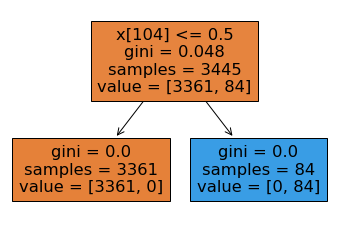

In [35]:
# Opción 1 
from sklearn import tree
import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10,10))
tree.plot_tree(dtc,filled = True,  max_depth=10) 


from google.colab import files
plt.savefig("DT1.pdf")
files.download("DT1.pdf")



# lo que entiendo es que está tomando la variable 105 y de ahí dice que tiene 84 1 y 3361 0. 
# ¿Porqué agarra la 105?
  # Pareciera ser que el depth no le afecta, sigue ploteando solo 1
  # x_test.columns.get_loc('polyuria') --> Orinar excesivamente (Tiene sentido!, es uno de los síntomas más comunes de la diabetes)
  # La 105 es polyuria y de hecho si tiene 84 positivos


# ¿Entonces, qué es lo que está haciendo detrás el descicion tree classifier?
  # ¿Será que de alguna manera determina que el diferenciador más importante para determinar si existe diabetes y no confundirlo con otra enfermedad que tengas síntomas similares sea la polyuria?

# https://www.youtube.com/watch?v=EMcNjJ6Gj8w
# Interpretacion parcial
  # Con la variable 105. Si es menor a .5 se va ala izquierda, Si es mayor a .5 se va a la derecha. 
  # Polyuria fue escogido por le split para maximizar el decrecimiento de la impurity de gini / O para incrementar la pureza del nodo.
  # Solo necesito un partición para llegar a mi conclusión de existencia o no existencia de diabetes. 
  # Entre más fuerte sea el color, la rama es más pura. El objetivo pricipal de este algoritmo. 





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

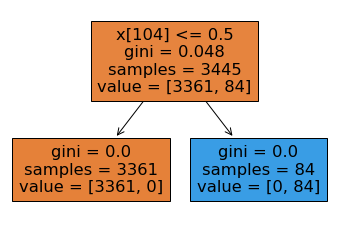

In [36]:
# Que sucedería su polyuria no estuviera presente

# Partir mis datos en entrenamiento y test

# Entrenamiento 
# Variables predictoras (síntomas)
x_train = df_train.drop(['increased_appetite'], axis=1) 

# Variable de interés. Presencia o ausencia de diabetes
y_train = df_train.prognosis 


#Test 
# Variables predictoras (síntomas)
x_test = df_test.drop('increased_appetite', axis=1) 

# Variable de interés. Presencia o ausencia de diabetes
y_test = df_test.prognosis 

dtc = DecisionTreeClassifier(max_depth=5)

# fit del árbol de desición
dtc.fit(x_train, y_train)

from sklearn import tree
import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10,10))
tree.plot_tree(dtc,filled = True,  max_depth=10) 

plt.savefig("DT2.pdf")
files.download("DT2.pdf")
